# 1. Initialization

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

d_train = pd.read_csv('Data/train.csv')
d_test = pd.read_csv('Data/test.csv')


# 2. Exploring Data

In [57]:
d_train.head()

# Pclass: A proxy for socio-economic status (SES)
# 1st = Upper  2nd = Middle  3rd = Lower

# Age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

# SibSp: Number of siblings/spouses aboard. The dataset defines family relations in this way...
# Sibling = brother, sister, stepbrother, stepsister. Spouse = husband, wife (mistresses and fiancés were ignored).

# Parch: Number of parents/children aboard. The dataset defines family relations in this way...
# Parent = mother, father. Child = daughter, son, stepdaughter, stepson. Some children travelled only with a nanny, therefore parch=0 for them.

# Cabin: Cabin number

# Embarked: Port of embarkation. C= Cherbourg, Q= Queenstown, S= Southampton.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [58]:
# d_train.describe()
# d_train.shape # 891 rows
# d_train.info()
d_test.info()
# d_train.isnull().sum()  # high null counts for Age and Cabin

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
# d_train.PassengerId = d_train.PassengerId.astype('category')
# d_train.Survived = d_train.Survived.astype('category')
# d_train.Pclass = d_train.Pclass.astype('category')
# d_train.Sex = d_train.Sex.astype('category')

# d_test.PassengerId = d_test.PassengerId.astype('category')
# d_test.Pclass = d_test.Pclass.astype('category')
# d_test.Sex = d_test.Sex.astype('category')

# Categorize Age
age_bin = [0, 12, 17, 60, np.inf]  # Age group boundaries
age_bin_lbl = [0, 1, 2, 3] #['child', 'teenager', 'adult', 'elder']  # Age group labels
d_train['AgeGroup'] = pd.cut(d_train.Age, age_bin, labels=age_bin_lbl)
d_test['AgeGroup'] = pd.cut(d_test.Age, age_bin, labels=age_bin_lbl)

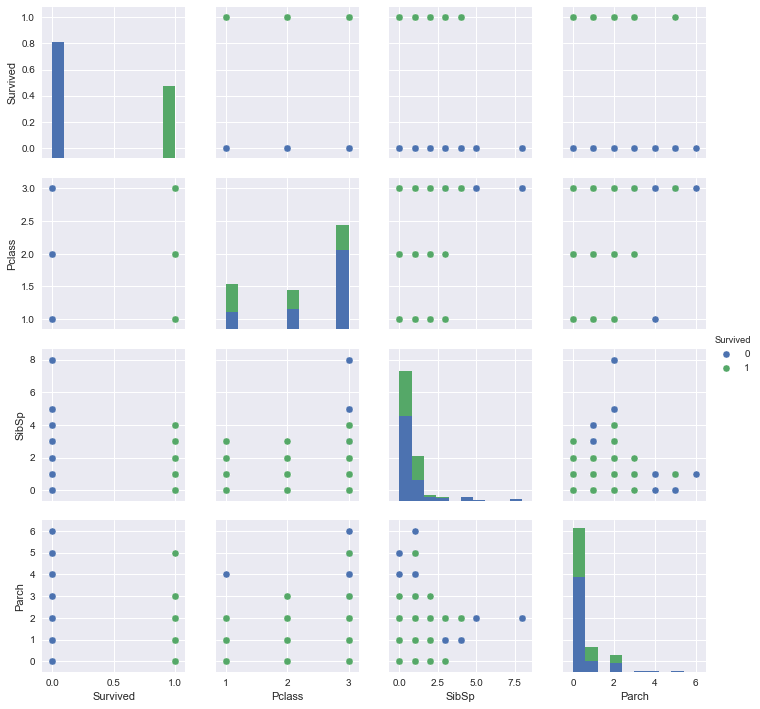

In [7]:
plt.clf()

d_subset = d_train.iloc[:, [1,2,6,7]]
sns.pairplot(d_subset, hue='Survived', size=2.5);

# sns.distplot(d_train.Age.dropna())

# g = sns.FacetGrid(d_train, row='Survived', col='Sex')
# g.map(sns.distplot, 'Age')

# sns.jointplot(data=d_train, x='Age', y='Fare', kind='reg')

# Survival heatmap based on age group and sex
# pivt = d_train.pivot_table(index='AgeGroup', columns='Sex', values='Survived', aggfunc=np.sum)
# sns.heatmap(pivt, annot=True, fmt='.1f')

# Correlation heatmap
# sns.heatmap(d_train.corr(), annot=True, fmt='.2f')

def bar_chart(feature):
    survived = d_train[d_train['Survived']==1][feature].value_counts()
    dead = d_train[d_train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True,figsize=(10,5))

# bar_chart('Sex')  
    
plt.show()


# 3. Feature Engineering

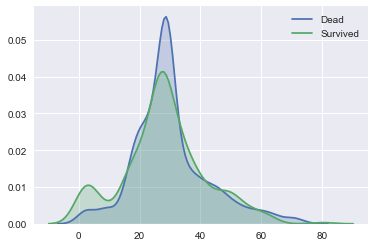

In [8]:
# Replace Age missing value with median of the gender
d_train['Age'].fillna(d_train.groupby('Sex')['Age'].transform('median'), inplace=True)
d_test['Age'].fillna(d_test.groupby('Sex')['Age'].transform('median'), inplace=True)
# Note: recalculate age groups after fillna

sns.kdeplot(d_train[d_train['Survived']==0]['Age'], shade=True, label='Dead')
sns.kdeplot(d_train[d_train['Survived']==1]['Age'], shade=True, label='Survived')
plt.show()


In [9]:
# Categorize Age
age_bin = [0, 12, 17, 60, np.inf]  # Age group boundaries
age_bin_lbl = [0, 1, 2, 3] #['child', 'teenager', 'adult', 'elder']  # Age group labels
d_train['AgeGroup'] = pd.cut(d_train.Age, age_bin, labels=age_bin_lbl)
d_test['AgeGroup'] = pd.cut(d_test.Age, age_bin, labels=age_bin_lbl)

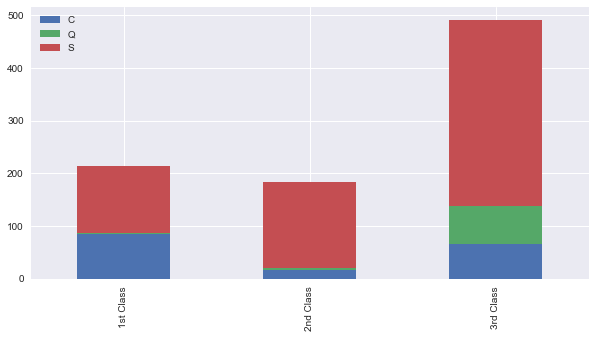

In [10]:
count_embarked_pcls1 = d_train[d_train['Pclass']==1]['Embarked'].value_counts()
count_embarked_pcls2 = d_train[d_train['Pclass']==2]['Embarked'].value_counts()
count_embarked_pcls3 = d_train[d_train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([count_embarked_pcls1,count_embarked_pcls2,count_embarked_pcls3])
df.index = ['1st Class','2nd Class','3rd Class']
df.plot(kind='bar', stacked=True, figsize=(10,5))
plt.show()

# Fill in na for Embarkation with the majority value S
d_train['Embarked'].fillna('S', inplace=True)
# d_train['Embarked'].fillna('S', inplace=True)

In [11]:
# d_test[d_test['Fare'].isnull()].head()

# Fill in na for Fare based on the mean of Pclass
d_test['Fare'] =d_test.groupby('Pclass')['Fare'].transform(lambda x: x.fillna(x.mean()))

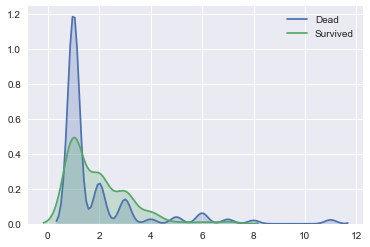

In [12]:
# Combine sibling and parent/child/spouse/sibling in FamilySize
d_train['FamilySize'] = d_train['SibSp'] + d_train['Parch'] + 1
d_test['FamilySize'] = d_test['SibSp'] + d_test['Parch'] + 1

sns.kdeplot(d_train[d_train['Survived']==0]['FamilySize'], shade=True, label='Dead')
sns.kdeplot(d_train[d_train['Survived']==1]['FamilySize'], shade=True, label='Survived')
plt.show()

In [16]:
# Prepare X and Y

df_train = d_train.copy()

df_train = df_train.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin', 'Age'], axis=1)
map_sex = {'female':1,'male':0}
df_train['Sex'] = df_train['Sex'].map(map_sex)

#df_train['Embarked'].drop_duplicates()
map_embark = {'C':0,'Q':1,'S':2}
df_train['Embarked'] = df_train['Embarked'].map(map_embark)

x_train = df_train.iloc[:,1:]
y_train = df_train.iloc[:,0]

# Split into test/train
from sklearn.model_selection import train_test_split
x_train, x_traintest, y_train, y_traintest = train_test_split(x_train, y_train, test_size=0.3, random_state=40)

In [20]:
# Perform feature standardization
from sklearn import preprocessing

x_train['Fare'] = preprocessing.scale(x_train['Fare'])
x_train['FamilySize'] = preprocessing.scale(x_train['FamilySize'])
x_traintest['Fare'] = preprocessing.scale(x_traintest['Fare'])
x_traintest['FamilySize'] = preprocessing.scale(x_traintest['FamilySize'])
# plt.hist(x_train['Fare'],10)
# plt.show()

x_train['Pclass'] = x_train['Pclass'].astype('category')
x_train['Sex'] = x_train['Sex'].astype('category')
x_train['Embarked'] = x_train['Embarked'].astype('category')
x_train['AgeGroup'] = x_train['AgeGroup'].astype('category')
x_traintest['Pclass'] = x_traintest['Pclass'].astype('category')
x_traintest['Sex'] = x_traintest['Sex'].astype('category')
x_traintest['Embarked'] = x_traintest['Embarked'].astype('category')
x_traintest['AgeGroup'] = x_traintest['AgeGroup'].astype('category')

d_test['PassengerId'] = d_test['PassengerId'].astype('category')
d_test['Pclass'] = d_test['Pclass'].astype('category')
d_test['Sex'] = d_test['Sex'].astype('category')



E:\Applications\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


# 4. Model Training

In [111]:
# Find best parameters for SVC using grid search cv

from sklearn import model_selection

# Choose a range for C and gamma params
c_range = np.logspace(-2, 10, 15)
gamma_range = np.logspace(-10, 2, 15)
grid_svc = GridSearchCV(SVC(), param_grid = dict(C=c_range, gamma=gamma_range), cv = 10, n_jobs=5)
grid_svc.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=5,
       param_grid={'C': array([1.00000e-02, 7.19686e-02, 5.17947e-01, 3.72759e+00, 2.68270e+01,
       1.93070e+02, 1.38950e+03, 1.00000e+04, 7.19686e+04, 5.17947e+05,
       3.72759e+06, 2.68270e+07, 1.93070e+08, 1.38950e+09, 1.00000e+10]), 'gamma': array([1.00000e-10, 7.19686e-10, 5.17947e-09, 3.72759e-08, 2.68270e-07,
       1.93070e-06, 1.38950e-05, 1.00000e-04, 7.19686e-04, 5.17947e-03,
       3.72759e-02, 2.68270e-01, 1.93070e+00, 1.38950e+01, 1.00000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [ ]:
# Find best parameters for SVC using grid search cv

from sklearn import model_selection

# Choose a range for C, gamma and degree params using poly kernel
c_range = np.logspace(-2, 10, 15)
gamma_range = np.logspace(-10, 2, 15)
grid_svc = GridSearchCV(SVC(kernel='poly'), param_grid = dict(C=c_range, gamma=gamma_range, degree=range(1,6)), cv = 10, n_jobs=5)
grid_svc.fit(x_train, y_train)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

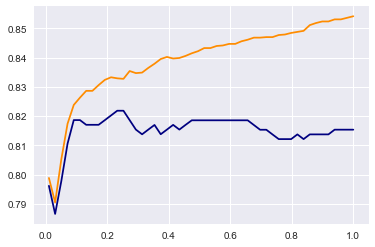

In [114]:
# Draw validation curve for svc using optimal parameters found above
from sklearn.model_selection import validation_curve
from sklearn import svm

param_range = np.linspace(.01, 1.0)

train_scores, test_scores = validation_curve(svm.SVC(C=1), 
                                             x_train, y_train, 
                                             param_name="gamma", 
                                             param_range=param_range, 
                                             cv=10, 
                                             scoring="accuracy", 
                                             n_jobs=1)

fig, ax = plt.subplots()
ax.plot(param_range, np.mean(train_scores, axis=1), color="darkorange")
ax.plot(param_range, np.mean(test_scores, axis=1), color="navy")

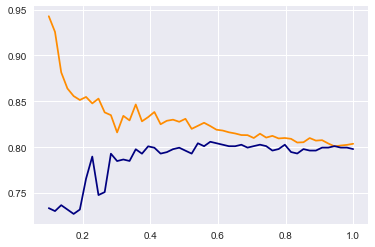

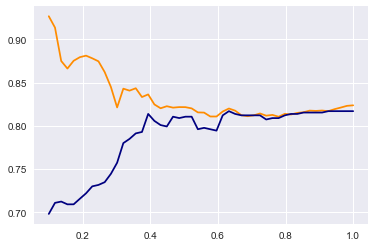

In [116]:
from sklearn import linear_model
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve


# Plot learning curve for a few estimators and continue with the best one
# Compare logistic regression and svm

train_size, train_scores, test_scores = learning_curve(linear_model.LogisticRegressionCV(),
                                                      x_train, y_train,
                                                      train_sizes=np.linspace(.1, 1.0),
                                                      cv = 10,
                                                      scoring = 'accuracy')

train_size_svc, train_scores_svc, test_scores_svc = learning_curve(SVC(C=1,gamma=.1),
                                                      x_train, y_train,
                                                      train_sizes=np.linspace(.1, 1.0),
                                                      cv = 10,
                                                      scoring = 'accuracy')

fig, ax = plt.subplots()
ax.plot(np.linspace(.1, 1.0), np.mean(train_scores, axis=1), color="darkorange")
ax.plot(np.linspace(.1, 1.0), np.mean(test_scores, axis=1), color="navy")

fig, ax = plt.subplots()
ax.plot(np.linspace(.1, 1.0), np.mean(train_scores_svc, axis=1), color="darkorange")
ax.plot(np.linspace(.1, 1.0), np.mean(test_scores_svc, axis=1), color="navy")

In [26]:
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error

# Train an svm(rbf) model

model_svc = SVC(C=1, gamma=.1, max_iter = 1000)

model_svc.fit(x_train, y_train)

y_traintest_pred = model_svc.predict(x_traintest)

print("Mean squared error: %.2f" % mean_squared_error(y_traintest, y_traintest_pred))


LogisticRegressionCV(Cs=10, class_weight=None, cv=10, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=1000,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring='roc_auc', solver='liblinear', tol=0.0001,
           verbose=0)

In [ ]:
# Predict the competition test set and export results

import csv

y_test = model_svc.predict(x_test)

result = pd.concat([x_test.iloc[:,0], pd.Series(y_test[:], name='Survived')], axis = 1)

with open('Data/result.csv', 'w') as resultfile:
    writer = csv.writer(resultfile, lineterminator ='\n')
    writer.writerows(result)
